# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [11]:
#installing the required libraries to generate K topics by using LDA
!pip install gensim nltk spacy pyLDAvis matplotlib pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyldavis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.4.1
    Uninstalling pyLDAvis-3.4.1:
      Successfully uninstalled pyLDAvis-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
#importing nltk packages and spacy model
import nltk; nltk.download('stopwords')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#importing the required packages
import re
import numpy as np
import pandas
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import spacy

# Load the newsgroup data
news_dataframe1 = pandas.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
news_dataframe1.head()
news_data = news_dataframe1.content.values.tolist()
print("Data before preprocessing:- ")
print(news_data[:10])
print("\n\n\n")

# Preprocessing the data
def preprocess_data(news_data):
  preprocessed_news_data=[]
  for each_record in news_data:
    each_record=re.sub('\S*@\S*\s?', '', each_record)
    each_record=re.sub('\s+', ' ', each_record)
    each_record=re.sub("\'", "", each_record)
    preprocessed_news_data.append(each_record)
  return preprocessed_news_data

news_data=preprocess_data(news_data)
print("Data after preprocessing:- ")
print(news_data[:10])
print("\n\n\n")

def convert_sentence_to_words(sentences):
    for each_sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(each_sentence), deacc=True))  # remove punctuations

data_words = list(convert_sentence_to_words(news_data))
print("List of words")
print(data_words[:1])

# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'edu', 'use', 'subject', 're'])

# Functions to remove stopwords in the data
def remove_stopwords_in_data(texts):
    return [[each_word for each_word in simple_preprocess(str(doc1)) if each_word not in stop_words] for doc1 in texts]
data_words=remove_stopwords_in_data(data_words)

print("Data after removing stopwords")
print(data_words[:1])

Data before preprocessing:- 
["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n", "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: Unive

In [ ]:
# Building bigram model
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

#building trigram model
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

['wheres', 'thing', 'car', 'nntp_posting_host', 'rac_wam_umd', 'organization', 'university', 'maryland_college_park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'really', 'small', 'addition', 'front_bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst']


In [ ]:
def make_bigram(texts_data):
    return [bigram_mod[doc] for doc in texts_data]

def make_trigram(texts_data):
    return [trigram_mod[bigram_mod[doc]] for doc in texts_data]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    result_texts= []
    for each_sentence in texts:
        doc1 = nlp(" ".join(each_sentence))
        result_texts.append([token.lemma_ for token in doc1 if token.pos_ in allowed_postags])
    return result_texts

bigrams_data_words = make_bigram(data_words)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(bigrams_data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['s', 'thing', 'car', 'nntp_poste', 'host', 'rac_wam', 'university', 'park', 'line', 'wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


In [ ]:
# Create the Dictionary and Corpus needed for Topic Modeling
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print("The produced corpus shown below is mapping of word_id and it's word_frequency")
print(corpus[:1])

# Function to compute coherence values for different number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print("Number of Topics:- ",num_topics)
        print('\nPerplexity: ', model.log_perplexity(corpus))
        print("Coherence value:- ",coherencemodel.get_coherence())
    return model_list, coherence_values

# Use this function to find the optimal number of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=3, limit=35, step=5)


The produced corpus shown below is mapping of word_id and it's word_frequency
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]
Number of Topics:-  3

Perplexity:  -7.9207027286233584
Coherence value:-  0.5260455893402664
Number of Topics:-  8

Perplexity:  -7.964126089694752
Coherence value:-  0.5442010279204827
Number of Topics:-  13

Perplexity:  -8.502407385718264
Coherence value:-  0.5512506449504658
Number of Topics:-  18

Perplexity:  -8.796281564482994
Coherence value:-  0.5492063285933204
Number of Topics:-  23

Perplexity:  -9.078939039103421
Coherence value:-  0.5456925186987838
Number of Topics:-  28

Perplexity:  -9.381712636309993
Coherence value:-  0.54333996020677

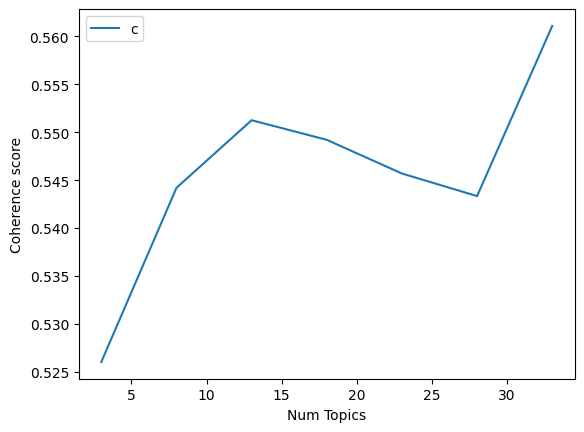

[(30,
  '0.885*"ax" + 0.059*"max" + 0.001*"ei" + 0.001*"wm" + 0.001*"pl_pl" + 0.001*"bhj_bhj" + 0.001*"qax" + 0.001*"fq" + 0.001*"sl" + 0.001*"giz_giz"'),
 (29,
  '0.079*"trade" + 0.022*"montreal" + 0.021*"cartridge" + 0.016*"ink" + 0.013*"ch" + 0.012*"mouse" + 0.009*"gilmour" + 0.009*"laser_printer" + 0.008*"latest_driver" + 0.008*"toner"'),
 (9,
  '0.025*"wave" + 0.015*"man" + 0.015*"absolute" + 0.014*"institute_technology" + 0.013*"number" + 0.012*"access_unix" + 0.011*"finnish" + 0.009*"new" + 0.009*"teenager" + 0.008*"prejudice"'),
 (10,
  '0.031*"motto" + 0.022*"advertising" + 0.015*"adl" + 0.014*"cal" + 0.011*"protestant" + 0.011*"que" + 0.011*"person" + 0.010*"business" + 0.009*"statute" + 0.009*"spy"'),
 (26,
  '0.061*"church" + 0.025*"catholic" + 0.015*"revelation" + 0.013*"tradition" + 0.010*"channel" + 0.010*"pope" + 0.009*"priest" + 0.008*"top_ten" + 0.008*"iranian" + 0.008*"doctrine"'),
 (16,
  '0.023*"tax" + 0.017*"taxis" + 0.016*"vat" + 0.015*"education" + 0.013*"david_

In [ ]:
# Show graph
limit=35; start=3; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# Choose the model with the highest coherence and print the topics
index_optimal_model= coherence_values.index(max(coherence_values))
optimal_model_1 = model_list[index_optimal_model]
optimal_model_1.print_topics(num_words=10)

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Load the newsgroup data
news_dataframe2 = pandas.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
news_dataframe2.head()
news_data_1 = news_dataframe2.content.values.tolist()
print("Data before preprocessing:- ")
print(news_data_1[:1])
print("\n\n\n")

def preprocess_news_data(news_data_1):
    # initializing the regex tokenizer
    r_tokenizer_1 = RegexpTokenizer(r'\w+')

    # Creating  p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()

    #stop words list
    stop_words = set(stopwords.words('english'))

    # list to store tokenized documents
    output_texts = []

    for word in news_data_1:
        # converting to lowercase
        raw_data = word.lower()
        data_tokens = r_tokenizer_1.tokenize(raw_data)
        # removing stop words from the tokens
        non_stopped_tokens = [each_word for each_word in data_tokens if not each_word in stop_words]
        # stem tokens
        data_stemmed_tokens = [p_stemmer.stem(token) for token in non_stopped_tokens]
        # adding tokens to the output list
        output_texts.append(data_stemmed_tokens)
    return texts

preprocessed_data_1=preprocess_news_data(news_data_1)
print("Data after preprocessing and converting them into tokens:- ")
print(preprocessed_data_1[:1])
print("\n\n\n")

Data before preprocessing:- 
["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]




Data after preprocessing and converting them into tokens:- 
[['s', 'thing', 'car', 'nntp_poste', 'host', 'rac_wam', 'university', 'park', 'line', 'wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look'

In [ ]:
#function to create term dictionary and Document Term Matrix
def prepare_corpus(preprocessed_data_1):
    dict_1 = corpora.Dictionary(preprocessed_data_1)
    term_matrix_1 = [dict_1.doc2bow(doc1) for doc1 in preprocessed_data_1]
    return dict_1,term_matrix_1

#funtion to create the LSA model
def create_gensim_lsa_model(preprocessed_data_1,topics_count,words):
    dict_1,term_matrix_1=prepare_corpus(preprocessed_data_1)
    # generate LSA model
    lsamodel_1 = LsiModel(term_matrix_1, num_topics=topics_count, id2word = dict_1)  # train model
    print(lsamodel_1.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel_1

In [ ]:
#function to calculate the coherence values for different number of topics
def compute_coherence_values(dict_1,term_matrix_1, preprocessed_data_1, start=3, step=4, limit=20,):
    coherence_values_list_1 = []
    model_list_1 = []
    for num_topics in range(start, limit, step):
        # generate LSA model
        model = LsiModel(term_matrix_1, num_topics=number_of_topics, id2word = dict_1)  # train model
        model_list_1.append(model)
        coherencemodel = CoherenceModel(model=model, texts=preprocessed_data_1, dictionary=dict_1, coherence='c_v')
        coherence_values_list_1.append(coherencemodel.get_coherence())
        print("Number of topics:- ", num_topics)
        print("Coherence value:- ",coherencemodel.get_coherence())
    return model_list_1, coherence_values_list_1

In [ ]:
 #LSA Model
number_of_topics=7
words=10
model=create_gensim_lsa_model(preprocessed_data_1,number_of_topics,words)

[(0, '0.998*"ax" + 0.066*"max" + 0.001*"ei" + 0.001*"wm" + 0.001*"qax" + 0.001*"bhj_bhj" + 0.001*"pl_pl" + 0.001*"fq" + 0.000*"giz_giz" + 0.000*"tm"'), (1, '0.242*"say" + 0.206*"file" + 0.196*"go" + 0.180*"get" + 0.168*"people" + 0.166*"know" + 0.144*"make" + 0.132*"see" + 0.131*"use" + 0.129*"also"'), (2, '0.434*"file" + -0.334*"say" + -0.251*"go" + 0.176*"image" + -0.162*"know" + -0.159*"people" + 0.153*"program" + -0.138*"think" + -0.135*"come" + -0.134*"s"'), (3, '0.632*"file" + 0.255*"entry" + -0.174*"system" + 0.152*"say" + -0.138*"use" + -0.107*"also" + -0.107*"available" + 0.097*"output" + 0.097*"go" + 0.097*"gun"'), (4, '-0.431*"image" + -0.160*"color" + 0.152*"entry" + -0.149*"say" + -0.146*"format" + -0.139*"go" + 0.137*"internet" + 0.134*"privacy" + -0.132*"version" + -0.131*"display"'), (5, '-0.293*"wire" + 0.237*"internet" + -0.225*"entry" + 0.197*"privacy" + 0.160*"anonymous" + -0.151*"circuit" + -0.144*"wiring" + 0.138*"mail" + 0.133*"user" + 0.123*"file"'), (6, '0.313*

Number of topics:-  3
Coherence value:-  0.5231163793002179
Number of topics:-  8
Coherence value:-  0.5554989747451157
Number of topics:-  13
Coherence value:-  0.5678304453528062
Number of topics:-  18
Coherence value:-  0.5617386135932253
Number of topics:-  23
Coherence value:-  0.5722806132404644
Number of topics:-  28
Coherence value:-  0.5443019029226424
Number of topics:-  33
Coherence value:-  0.582776330127121


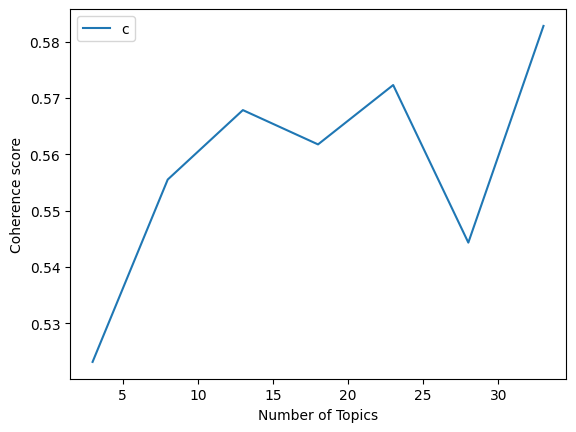

In [ ]:
def plot_graph(preprocessed_data_1,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(preprocessed_data_1)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,preprocessed_data_1, start, step, stop)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

limit=35; start=3; step=5;
plot_graph(preprocessed_data_1,start,limit,step)

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [1]:
!pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis

  Cloning https://github.com/bmabey/pyLDAvis.git (to revision master) to /tmp/pip-install-rh8zwzx7/pyldavis_d1e8a7c8b1a34a899995b1d012e891ae
  Running command git clone --filter=blob:none --quiet https://github.com/bmabey/pyLDAvis.git /tmp/pip-install-rh8zwzx7/pyldavis_d1e8a7c8b1a34a899995b1d012e891ae
  Resolved https://github.com/bmabey/pyLDAvis.git to commit 16800f36bc95b4c99d8c26d51daa3485c8cb76da
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.6 MB/s eta 0:00:00
  Created wheel for pyLDAvis: filename=pyLDAvis-3.4.1-py3-none-any.whl size=137039 sha256=669e9a5f42f767ee6b6765043229908b38df7b66c0a9f7357c08e442c31e69a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-6emrtu0a/wheels/37/51/42/a8bf36e7ac84204262a77656ae9bc978ac373e416346b38588
Successfully built pyLDAvis
  Attempting uninstall: pand

In [2]:
!git clone https://github.com/cemoody/lda2vec.git
!pip install --upgrade lda2vec

fatal: destination path 'lda2vec' already exists and is not an empty directory.


In [3]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [4]:
import lda2vec
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
!pip install chainer

In [10]:
import spacy
!python lda2vec/lda2vec/__init__.py
!python lda2vec/examples/twenty_newsgroups/lda2vec/lda2vec_run.py

Traceback (most recent call last):
  File "/content/lda2vec/lda2vec/__init__.py", line 4, in <module>
    import preprocess
  File "/content/lda2vec/lda2vec/preprocess.py", line 1, in <module>
    from spacy.en import English
ModuleNotFoundError: No module named 'spacy.en'
  File "/content/lda2vec/examples/twenty_newsgroups/lda2vec/lda2vec_run.py", line 24
    print "Using GPU " + str(gpu_id)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?


In [13]:
import numpy as np

# Load the npz file
data_npz = np.load('lda2vec/examples/twenty_newsgroups/lda2vec/topics.pyldavis.npz', allow_pickle=True)

# Convert to a regular dictionary
data = {key: data_npz[key] for key in data_npz.files}

# Now you can modify the dictionary
data['vocab'] = data['vocab'].tolist()
data['term_frequency'] = data['term_frequency'] * 1.0 / data['term_frequency'].sum()


In [14]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(data['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [data['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words



Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

In [16]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(data['topic_term_dists'], data['doc_topic_dists'],
                                 data['doc_lengths'] * 1.0, data['vocab'], data['term_frequency'] * 1.0, mds='tsne')

In [17]:
pyLDAvis.display(prepared_data)

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
#installing BERTopic
%%capture
!pip install bertopic

In [ ]:
# Write your code here
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups  # Example dataset

# Loading example dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']

# Initialize BERTopic model
model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model to your corpus
topics, probabilities = model.fit_transform(data)

2024-03-30 04:07:22,515 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-03-30 04:49:53,164 - BERTopic - Embedding - Completed ✓
2024-03-30 04:49:53,167 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 04:51:06,449 - BERTopic - Dimensionality - Completed ✓
2024-03-30 04:51:06,452 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 04:52:29,934 - BERTopic - Cluster - Completed ✓
2024-03-30 04:52:29,969 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 04:52:37,769 - BERTopic - Representation - Completed ✓


In [ ]:
print("This are the most frequent topics, they will best represent the collection of documents.")
freq = model.get_topic_info(); freq.head(5)

print("\n\nThe most frequent topic is ")
model.get_topic(0)

This are the most frequent topics, they will best represent the collection of documents.


The most frequent topic is 


[('game', 0.01014693802931947),
 ('team', 0.008856388450055852),
 ('games', 0.007063104290777193),
 ('he', 0.006772405792789323),
 ('players', 0.006222468805084438),
 ('season', 0.00613050472330354),
 ('hockey', 0.006034627415182373),
 ('play', 0.00568445684200739),
 ('25', 0.005534998463579893),
 ('year', 0.00547703330319569)]

In [ ]:
#visualizing topics
model.visualize_topics()

In [ ]:
#visualizing probabilities of topics
model.visualize_distribution(probabilities[200], min_probability=0.015)

In [ ]:
#visualizing topic hierarchy
model.visualize_hierarchy(top_n_topics=50)

In [ ]:
#visualizing terms
model.visualize_barchart(top_n_topics=5)

In [ ]:
#visualizing term score decline
model.visualize_term_rank()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
BERTopic is anticipated to have superior performance in terms of coherence and interpretability owing to its sophisticated embedding strategies.
LDA and lda2vec are both commonly used methods, although LDA's coherence is significantly better since it uses a probabilistic technique to determine topic distributions.
LSA is beneficial but it may be fall behind in capturing the subtle complexity of language that approaches based on embeddings may achieve. LDA will take higher runtime to compute the coherence values.


LSA and LDA exhibit more simplicity and efficiency in training when compared to lda2vec and BERTopic. BERTopic and the other two methods, particularly BERTopic, need more processing resources and
time since they heavily depend on neural network models and embeddings.

lda2vec and BERTopic provide enhanced resilience to subtle variations in language and more flexibility in collecting contextual information. Nevertheless, this advantage is accompanied by
the drawback of heightened intricacy and the need for more extensive datasets to provide optimal training without succumbing to overfitting.

Optimal Selection: If there are no limitations in terms of processing resources and time, and the dataset is intricate with abundant linguistic characteristics, BERTopic would be the most
suitable option owing to its sophisticated skills in comprehending context and semantics. When dealing with simpler applications or limited resources, LDA provides a favorable trade-off between
performance and complexity.

Selecting the optimal approach is contingent upon the precise requirements, attributes of the dataset, computing resources at hand, and the unique intricacies of the text under analysis.
When doing exploratory research or dealing with fewer datasets, it may be more advantageous to use LDA. BERTopic or lda2vec will provide the better outcomes, provided that the complexity
and resource consumption are reasonable.

'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
If we had more resources about lda2vec, it will be helpful.
One of main challenge I faced is highest runtime of few code lines

'''